In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Amazon Sale Report.csv")
print(df.head().to_string())

   index             Order ID      Date                        Status Fulfilment Sales Channel  ship-service-level    Style              SKU       Category Size        ASIN Courier Status  Qty currency  Amount    ship-city   ship-state  ship-postal-code ship-country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [3]:
print(df.isna().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64


Data cleaning

In [4]:
df["Courier Status"] = df["Courier Status"].fillna(0)
df["currency"] = df["currency"].fillna(0)
df["Amount"] = df["Amount"].fillna(0)
df["ship-city"] = df["ship-city"].fillna("None")
df["ship-state"] = df["ship-state"].fillna("None")
df["ship-country"] = df["ship-country"].fillna("None")
df["ship-postal-code"] = df["ship-postal-code"].fillna("None")
df["promotion-ids"] = df["promotion-ids"].fillna("None")
df["fulfilled-by"] = df["fulfilled-by"].fillna("None")
print(df.isna().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


EDA

In [5]:
print(df.describe().to_string())

               index            Qty         Amount
count  128975.000000  128975.000000  128975.000000
mean    64487.000000       0.904431     609.363662
std     37232.019822       0.313354     313.347147
min         0.000000       0.000000       0.000000
25%     32243.500000       1.000000     413.000000
50%     64487.000000       1.000000     583.000000
75%     96730.500000       1.000000     771.000000
max    128974.000000      15.000000    5584.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [7]:
print("-------------------------")
print(f"Shape : {df.shape}")
print("-------------------------")
print(f"Dtypes : {df.dtypes}")


-------------------------
Shape : (128975, 23)
-------------------------
Dtypes : index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code       object
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
dtype: object


In [22]:
df["Total_Sales"] = df["Qty"] * df["Amount"]
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Month"].replace({3:"March",4:"April",5:"May",6:"June"})
df["Day"] = df["Date"].dt.dayofweek
# df["Day"] = df["Date"].dt.day
df["Day"] = df["Day"].replace({0:"Monday",1:"Tuesday",2:"wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
df['ISB2B'] = df['B2B'].apply(lambda x: 1 if x==True else(0))

Data visualization

Category
Blouse             441259.0
Bottom             142870.0
Dupatta               915.0
Ethnic Dress       762949.0
Saree              125767.0
Set              37934434.0
Top               5242931.0
Western Dress    10707932.0
kurta            20675349.0
Name: Total_Sales, dtype: float64


[Text(0, 0, '441259'),
 Text(0, 0, '142870'),
 Text(0, 0, '915'),
 Text(0, 0, '762949'),
 Text(0, 0, '125767'),
 Text(0, 0, '3.79344e+07'),
 Text(0, 0, '5.24293e+06'),
 Text(0, 0, '1.07079e+07'),
 Text(0, 0, '2.06753e+07')]

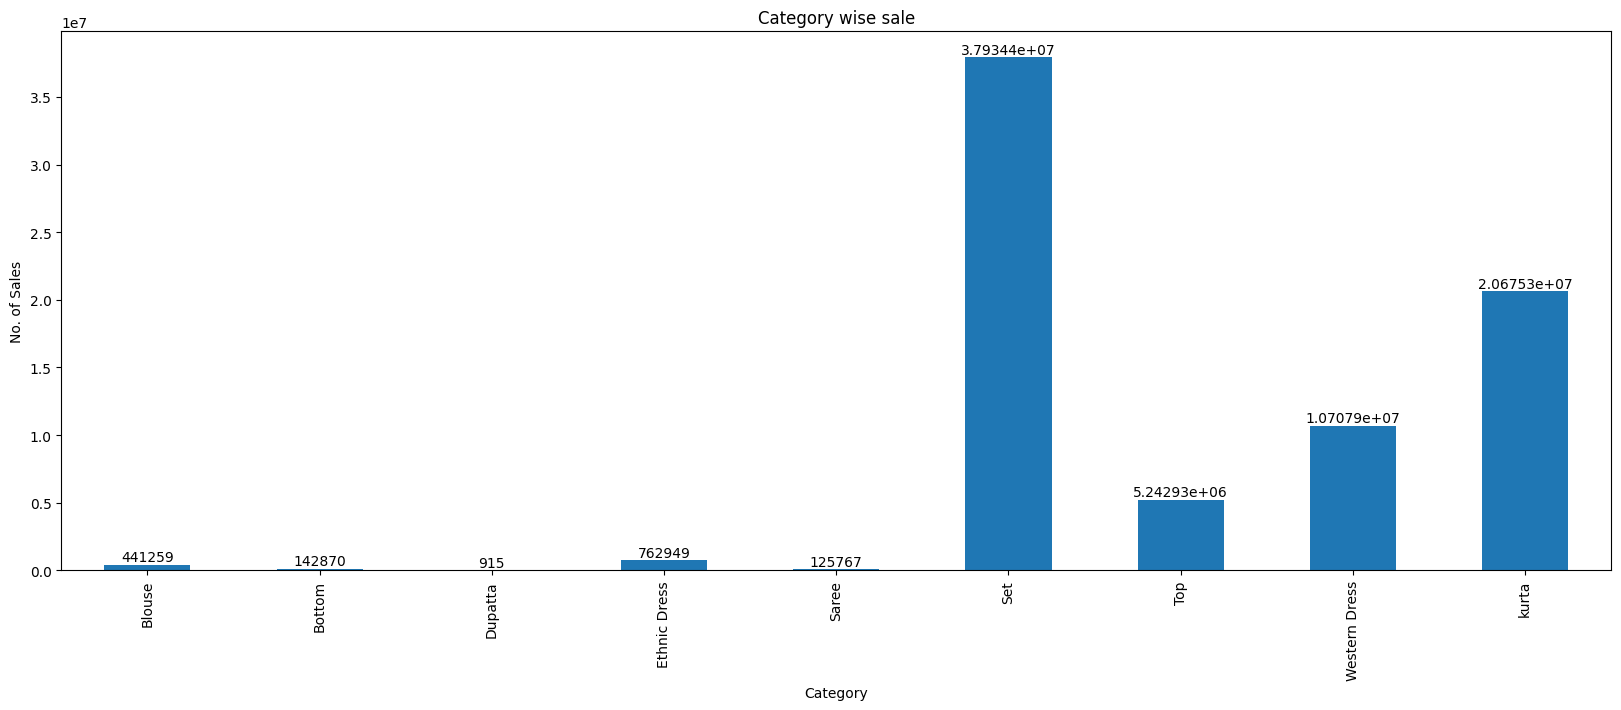

In [9]:
# Which category has maximum sale
category = df.groupby('Category')['Total_Sales'].sum()
print(category)
plt.title("Category wise sale")
plt.ylabel("No. of Sales")
ax = category.plot.bar(figsize=(20,7))
ax.bar_label(ax.containers[0])

In [10]:
# category wise size
x = df.groupby(['Category','Size']).size().unstack()
# x = df.groupby(['Category','Size'], as_index=False)['Size'].count()
df = df.fillna(0,axis=0)
# df = df.replace(,0)
print(x.to_string())
# print(type(x))
# sns.barplot(x)

Size              3XL    4XL    5XL    6XL   Free       L       M       S      XL      XS     XXL
Category                                                                                         
Blouse            NaN    NaN    NaN    NaN  211.0   136.0   154.0   140.0   133.0    28.0   124.0
Bottom           64.0    NaN    NaN    NaN    NaN    71.0    58.0    74.0    71.0    28.0    74.0
Dupatta           NaN    NaN    NaN    NaN    3.0     NaN     NaN     NaN     NaN     NaN     NaN
Ethnic Dress    172.0    NaN    NaN    NaN    NaN   192.0   180.0   176.0   194.0    88.0   157.0
Saree             NaN    NaN    NaN    NaN  164.0     NaN     NaN     NaN     NaN     NaN     NaN
Set            5795.0   48.0   61.0   81.0    NaN  8194.0  9347.0  7512.0  7572.0  5506.0  6168.0
Top            1184.0    NaN    NaN    NaN    NaN  1774.0  1825.0  1238.0  1855.0   949.0  1797.0
Western Dress  1915.0    NaN    NaN    NaN    NaN  2845.0  2587.0  2225.0  2379.0  1431.0  2118.0
kurta          5686.

([<matplotlib.patches.Wedge at 0x23ab19633d0>,
 [Text(0.44874007115311154, 1.0043068995787594, 'April'),
  Text(-1.094495259925402, -0.10990962651572761, 'June'),
  Text(-0.552439317579191, -0.951215433218279, 'March'),
  Text(0.6508429764387753, -1.1253459112736475, 'May')],
 [Text(0.2447673115380608, 0.547803763406596, '36.62%'),
  Text(-0.5969974145047646, -0.05995070537221505, '29.94%'),
  Text(-0.30133053686137684, -0.5188447817554248, '0.13%'),
  Text(0.400518754731554, -0.692520560783783, '33.31%')])

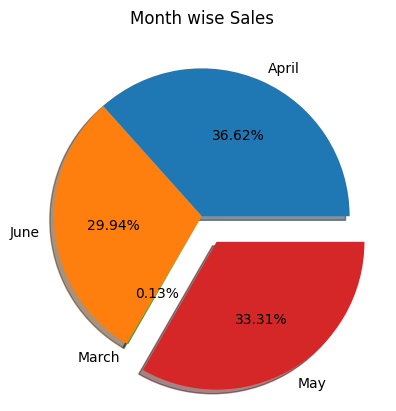

In [11]:
# month wise max sales

month_sales = df.groupby('Month')['Total_Sales'].sum()
plt.title("Month wise Sales")
plt.pie(month_sales,labels=month_sales.index,shadow=True,explode=[0,0,0,0.2],autopct="%0.2f%%")

The maximum sales were made in April.
The minimum sales were made in March.

Top 20 cities from where max. sales are made?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'BENGALURU'),
  Text(1, 0, 'HYDERABAD'),
  Text(2, 0, 'MUMBAI'),
  Text(3, 0, 'NEW DELHI'),
  Text(4, 0, 'CHENNAI'),
  Text(5, 0, 'PUNE'),
  Text(6, 0, 'KOLKATA'),
  Text(7, 0, 'GURUGRAM'),
  Text(8, 0, 'THANE'),
  Text(9, 0, 'LUCKNOW'),
  Text(10, 0, 'NOIDA'),
  Text(11, 0, 'GHAZIABAD'),
  Text(12, 0, 'AHMEDABAD'),
  Text(13, 0, 'NAVI MUMBAI'),
  Text(14, 0, 'BANGALORE'),
  Text(15, 0, 'JAIPUR'),
  Text(16, 0, 'FARIDABAD'),
  Text(17, 0, 'PATNA'),
  Text(18, 0, 'VISAKHAPATNAM'),
  Text(19, 0, 'BHUBANESWAR')])

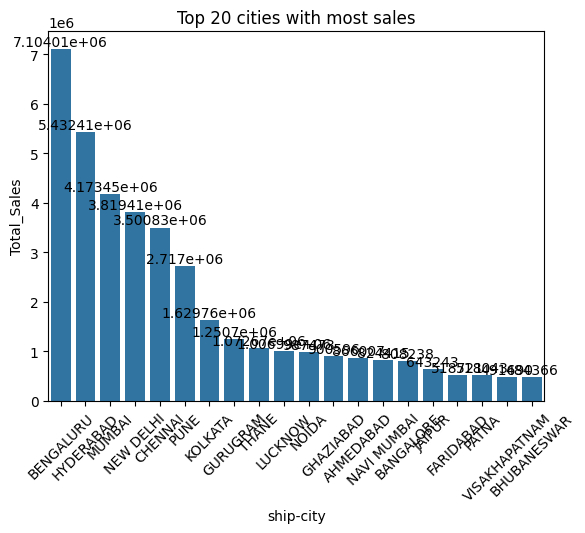

In [12]:
# City 
# s = df["ship-city"].value_counts()
# l = list(df["ship-city"].unique())

df["ship-city"] = df["ship-city"].str.upper()
city_wise = df.groupby("ship-city")["Total_Sales"].sum().sort_values(ascending=False).head(20)
plt.title("Top 20 cities with most sales")
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(city_wise)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

On which day of the week max. sales are made?

[Text(0, 0, '1.0448e+07'),
 Text(0, 0, '1.09514e+07'),
 Text(0, 0, '1.10118e+07'),
 Text(0, 0, '1.16244e+07'),
 Text(0, 0, '9.99965e+06'),
 Text(0, 0, '1.11623e+07'),
 Text(0, 0, '1.08368e+07')]

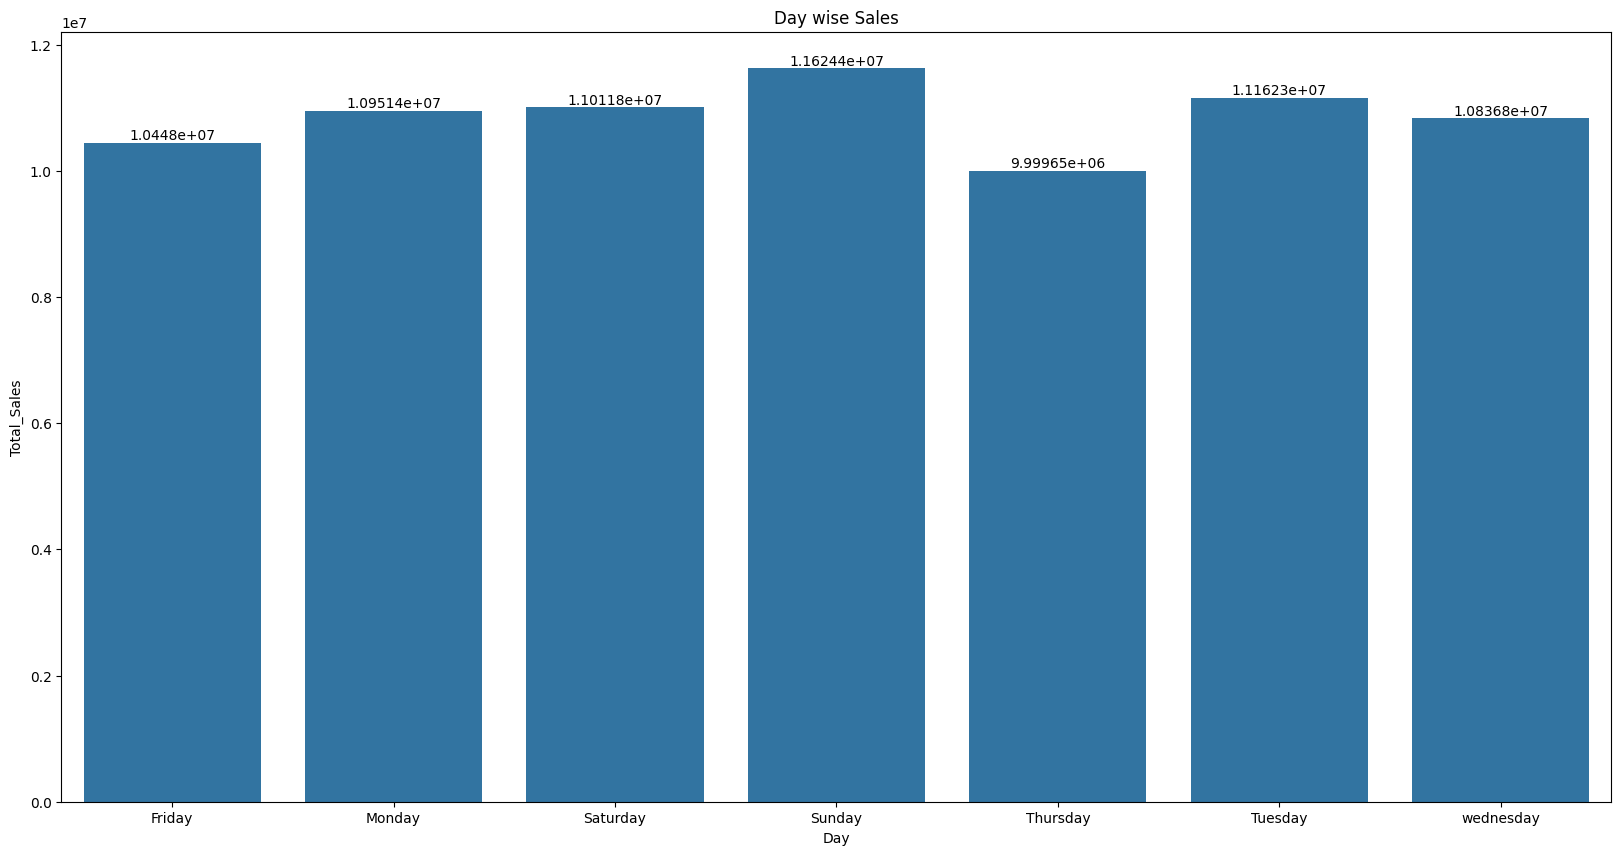

In [13]:
# Day wise Sales
day_wise = df.groupby("Day")['Total_Sales'].sum()
plt.title("Day wise Sales")
ax = sns.barplot(day_wise)
ax.bar_label(ax.containers[0])

[Text(0, 0, '0'), Text(0, 0, '327.863')]

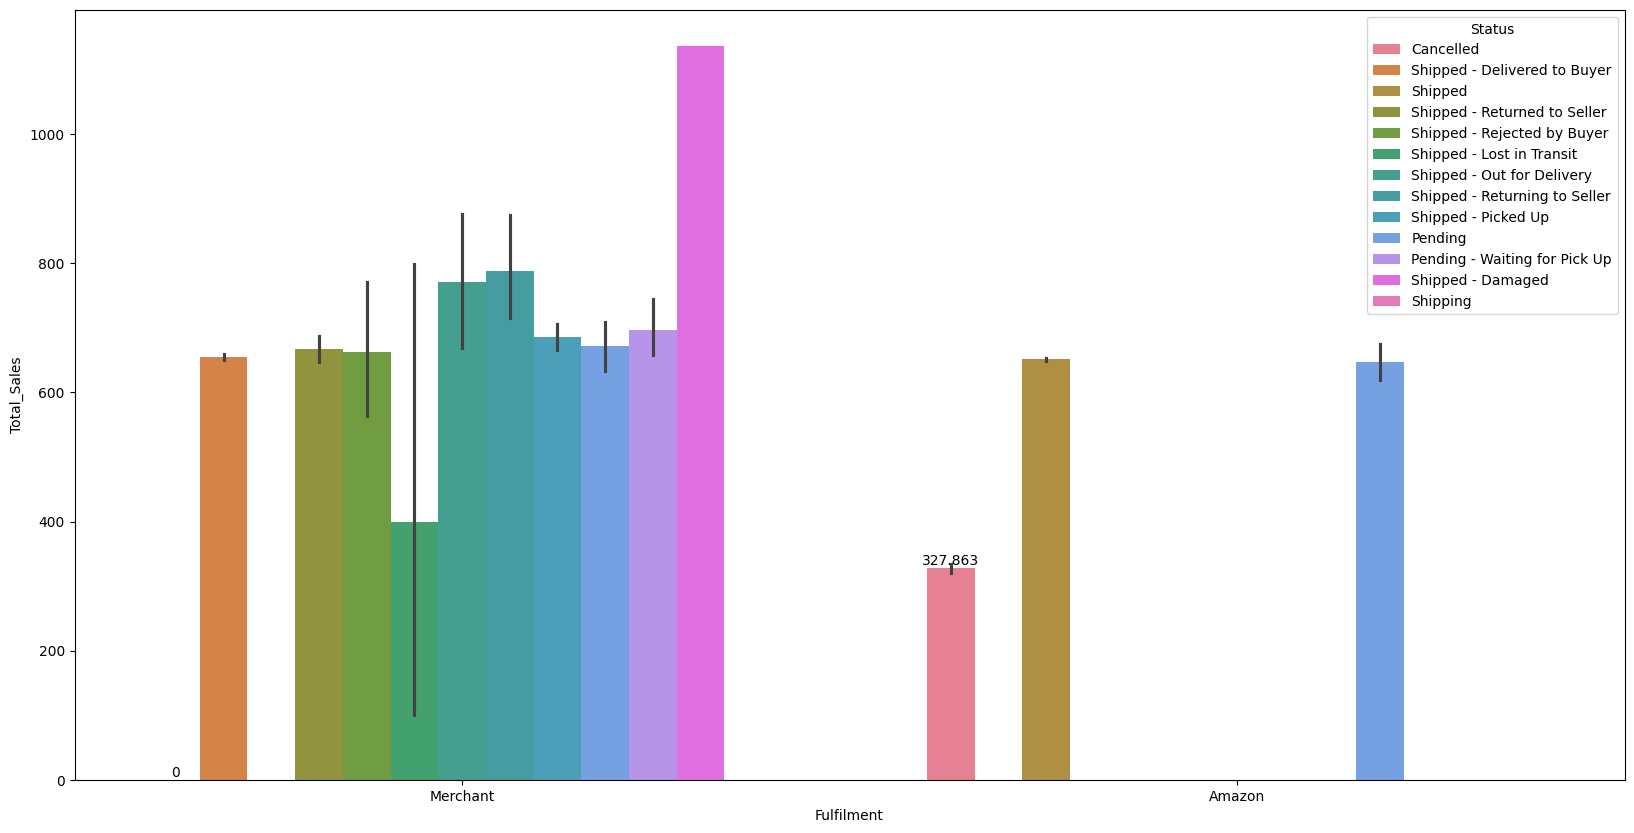

In [14]:
ax = sns.barplot(x='Fulfilment',y='Total_Sales',data=df,hue="Status")
ax.bar_label(ax.containers[0])

In [15]:
# Which state has sales in which category
state_sale_category = df.groupby(['ship-state','Category'],as_index=False)['Total_Sales'].sum()
state_sale_category

,ship-state,Category,Total_Sales
0,ANDAMAN & NICOBAR,Bottom,518.0
1,ANDAMAN & NICOBAR,Set,90850.0
2,ANDAMAN & NICOBAR,Top,5808.0
3,ANDAMAN & NICOBAR,Western Dress,17287.0
4,ANDAMAN & NICOBAR,kurta,35476.0
...,...,...,...
322,rajasthan,Ethnic Dress,845.0
323,rajasthan,Set,563.0
324,rajasthan,Top,754.0
325,rajasthan,Western Dress,1784.0


         Category  Size  Total_Sales
0          Blouse  Free      81584.0
1          Blouse     L      68799.0
2          Blouse     M      75436.0
3          Blouse     S      69564.0
4          Blouse    XL      69634.0
5          Blouse    XS       9427.0
6          Blouse   XXL      66815.0
7          Bottom   3XL      22945.0
8          Bottom     L      24617.0
9          Bottom     M      17692.0
10         Bottom     S      21534.0
11         Bottom    XL      23032.0
12         Bottom    XS       8806.0
13         Bottom   XXL      24244.0
14        Dupatta  Free        915.0
15   Ethnic Dress   3XL     117767.0
16   Ethnic Dress     L     117221.0
17   Ethnic Dress     M     128440.0
18   Ethnic Dress     S     120479.0
19   Ethnic Dress    XL     130405.0
20   Ethnic Dress    XS      52878.0
21   Ethnic Dress   XXL      95759.0
22          Saree  Free     125767.0
23            Set   3XL    4399187.0
24            Set   4XL      56457.0
25            Set   5XL      67689.0
2

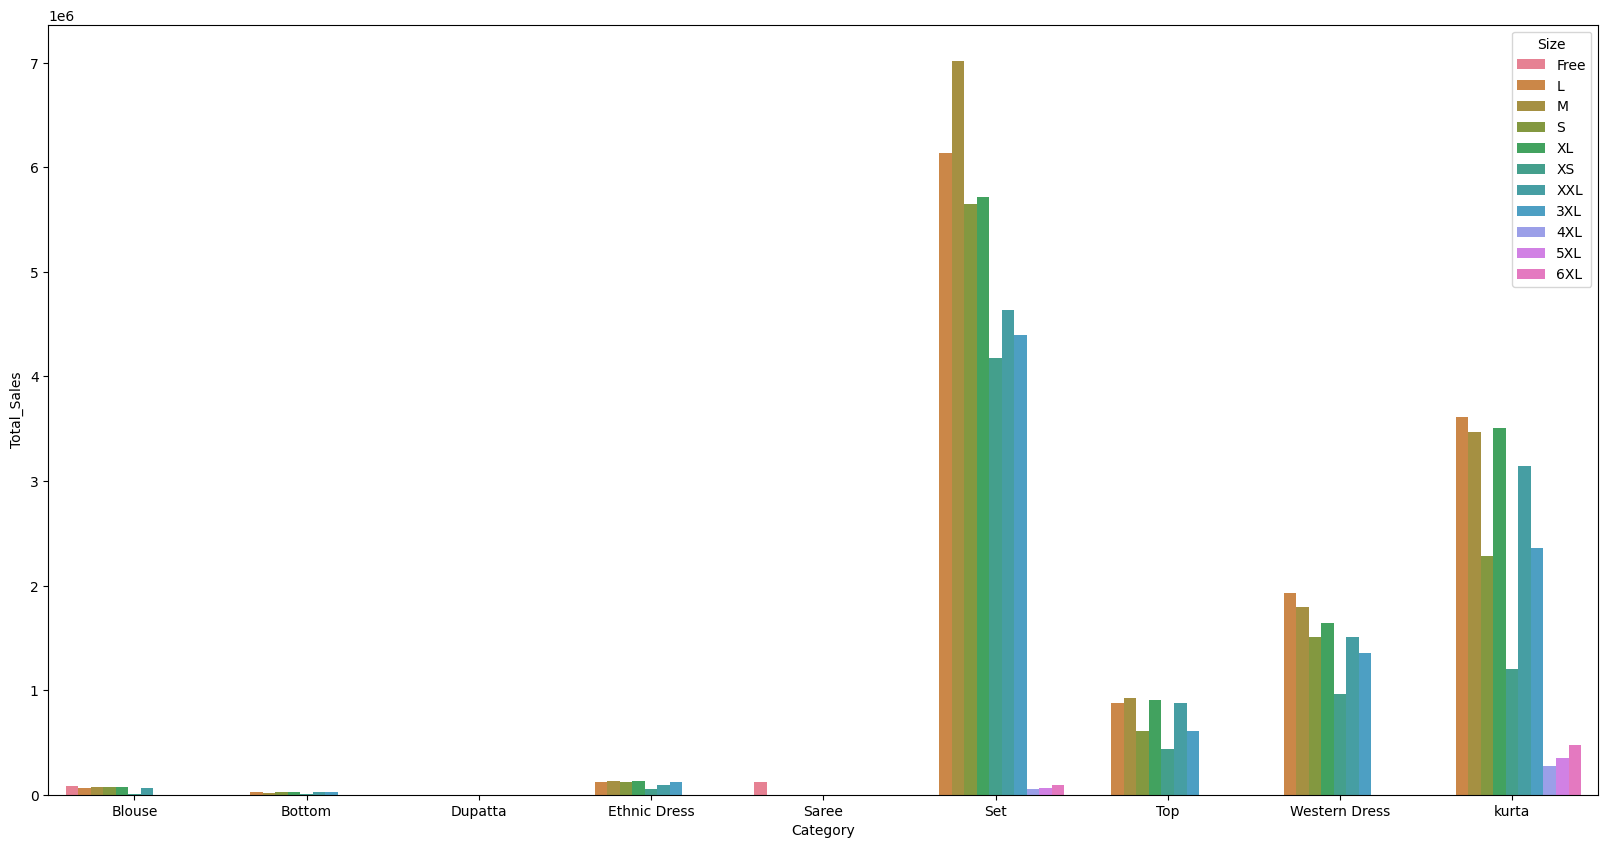

In [16]:
# Total Sales made in each category in each size
w = df.groupby(['Category','Size'],as_index=False)['Total_Sales'].sum()
print(w)
ax = sns.barplot(x='Category',y='Total_Sales',data=w,hue="Size")
# ax.bar_label(ax.containers[0])

Which Category has max sale in each month?

    Month       Category  Total_Sales
0   April         Blouse     189799.0
1   April         Bottom      61877.0
2   April   Ethnic Dress     237600.0
3   April          Saree      51460.0
4   April            Set   15004564.0
5   April            Top    1785155.0
6   April  Western Dress    2829090.0
7   April          kurta    7687700.0
8    June         Blouse     100216.0
9    June         Bottom      35492.0
10   June        Dupatta        915.0
11   June   Ethnic Dress     243013.0
12   June          Saree      26040.0
13   June            Set   10673685.0
14   June            Top    1497146.0
15   June  Western Dress    3716763.0
16   June          kurta    6468947.0
17  March         Blouse        280.0
18  March   Ethnic Dress       1099.0
19  March            Set      53884.0
20  March            Top       4511.0
21  March  Western Dress       5479.0
22  March          kurta      33008.0
23    May         Blouse     150964.0
24    May         Bottom      45501.0
25    May   

<Axes: xlabel='Month', ylabel='Total_Sales'>

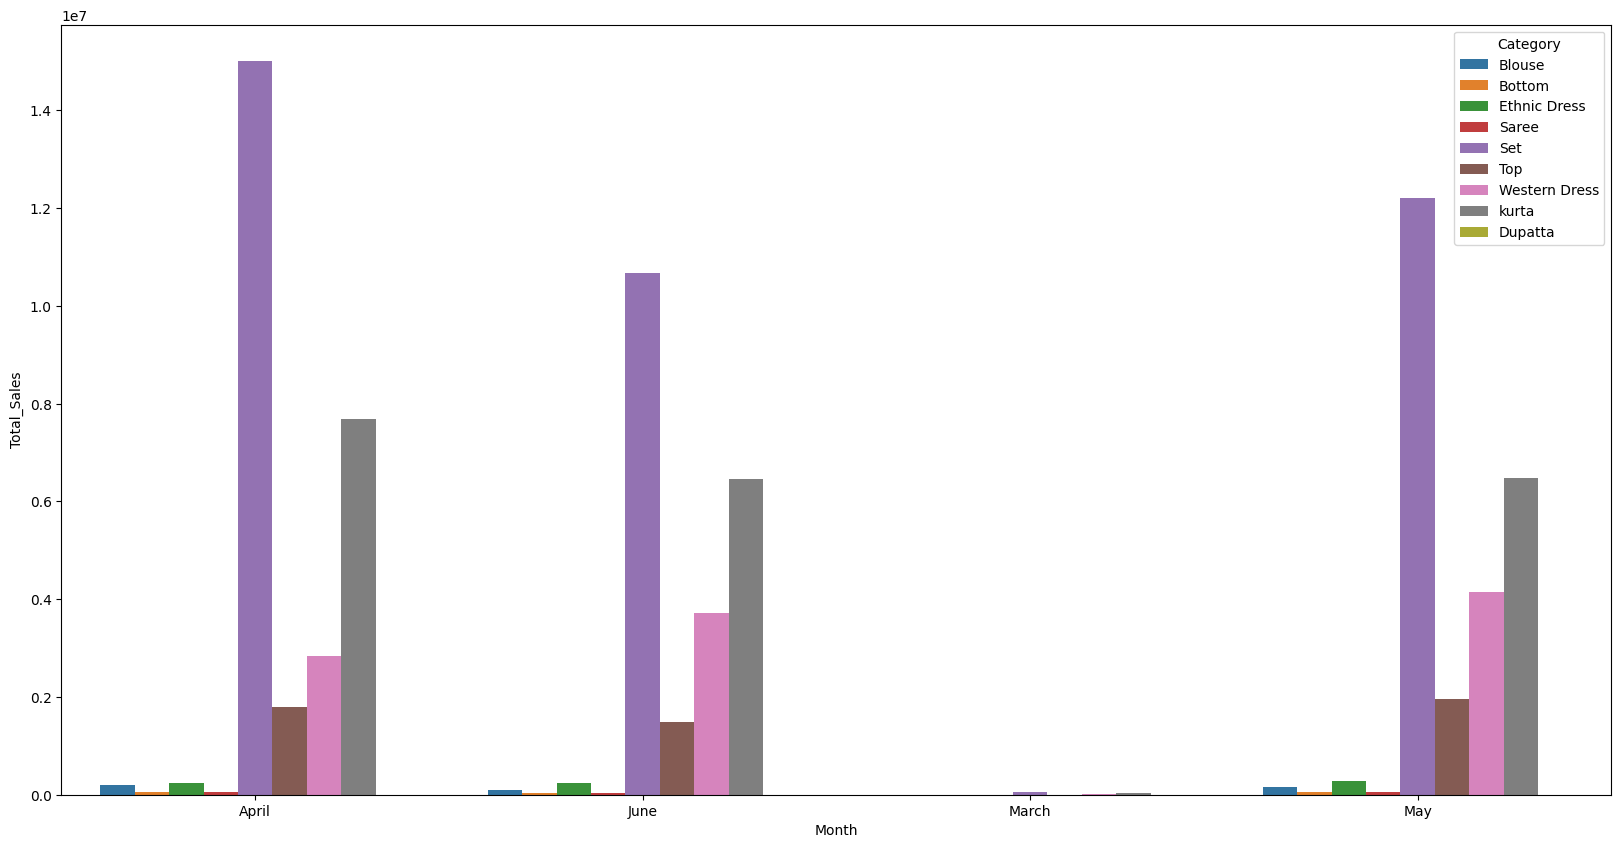

In [17]:
month_cat = df.groupby(['Month','Category'],as_index=False)['Total_Sales'].sum()
print(month_cat)
sns.barplot(x='Month',y='Total_Sales',data=month_cat,hue="Category")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
x = df[['Qty','Amount']]
y = df['Total_Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,random_state=100,test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
obj = model.predict(x_test)
print(r2_score(y_test,obj))

0.8562096655988876


In [19]:
print(df.head(2).to_string())

   index             Order ID       Date                        Status Fulfilment Sales Channel  ship-service-level    Style              SKU Category Size        ASIN Courier Status  Qty currency  Amount  ship-city   ship-state ship-postal-code ship-country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

<Axes: xlabel='Amount', ylabel='Qty'>

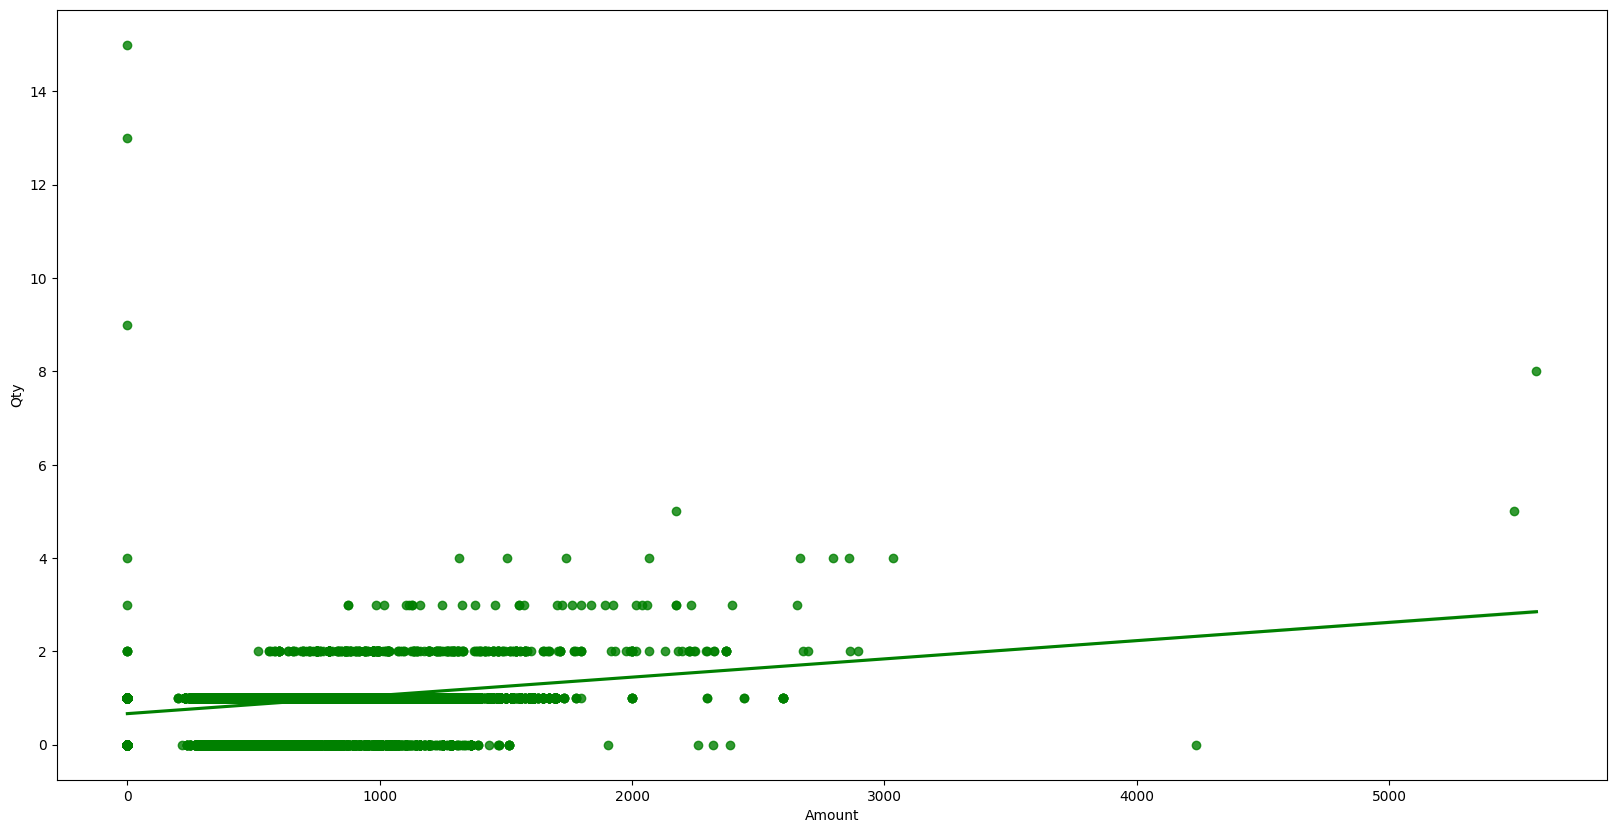

In [20]:
sns.regplot(x='Amount',y='Qty',data=df,color='g')

In [32]:
# Prepare data for regression
monthly_sales = df.groupby(['month','Total_Sales'],as_index=False)['Total_Sales'].sum()
print(month_sales)
monthly_sales['month'] = monthly_sales.index
X = monthly_sales[['month']]
y = monthly_sales

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict sales for the next month (july, assuming continuous months)
next_month_num = 7  # july
predicted_sales = model.predict([[next_month_num]])
print("Predicted sales for next month:", predicted_sales)

Month
April    27847245.0
June     22762217.0
March       98261.0
May      25326683.0
Name: Total_Sales, dtype: float64
Predicted sales for next month: [[7.00000000e+00 4.33939546e+04]]


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
